In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [57]:
data = pd.read_csv("train.csv")
data.head(12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [58]:
data.shape

(891, 12)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Variable Notes

1. Survived Survived (1) or died (0) - Идентификатор выжил пассажир или нет
2. Pclass Passenger's class (1st, 2nd, or 3rd) - Класс пассажира
3. Name Passenger's name - Имя
4. Sex Passenger's sex - Пол
5. Age Passenger's age - Возраст
6. SibSp Number of siblings/spouses aboard the Titanic - Количество родственников/пар на корабле
7. Parch Number of parents/children aboard the Titanic - Количество родителей/детей на корабле
8. Ticket Ticket number - Номер билета
9. Fare Fare paid for ticket - Стоимость билета
10. Cabin Cabin number - Номер каюты пассажира
11. embarked Where the passenger got on the ship (C - Cherbourg, S - Southampton, Q = Queenstown) - Откуда плыл пассажир








In [60]:
data['Sex'] = data['Sex'].replace({'male': 0, 'female': 1})

<ipython-input-61-d6477d832b34>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr().abs()


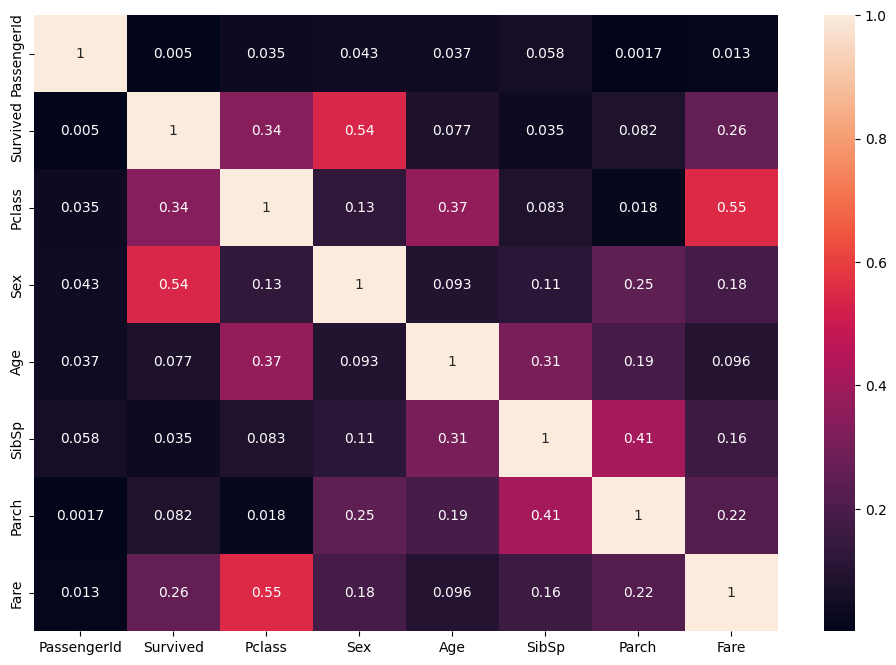

In [61]:

plt.figure(figsize=(12,8))
corr = data.corr().abs()
ax = sns.heatmap(corr, annot=True)

In [62]:
srmale = data['Age'][data.Sex == "male"].agg(["mean", "max", "min"])
srfemale = data['Age'][data.Sex == "female"].agg(["mean", "max", "min"])
print(f"Средний возраст мужчин {srmale[0]}")
print(f"Максимальный возраст мужчин {srmale[1]}")
print(f"Минимальный возраст мужчин {srmale[2]}")
print(f"Средний возраст женщин {srfemale[0]}")
print(f"Максимальный возраст женщин {srfemale[1]}")
print(f"Минимальный возраст женщин {srfemale[2]}")


Средний возраст мужчин nan
Максимальный возраст мужчин nan
Минимальный возраст мужчин nan
Средний возраст женщин nan
Максимальный возраст женщин nan
Минимальный возраст женщин nan


In [74]:
print(data[["Survived", "Age", "Sex"]][data.Survived == 1].groupby("Sex").agg({"Age":["mean", "median"]}))
data[["Survived","Age","Sex"]][data.Survived == 1].groupby("Sex").agg({"Age":["mean", "median"]})



           Age       
          mean median
Sex                  
0    27.276022   28.0
1    28.847716   28.0


Age       
          mean median
Sex                  
0    27.276022   28.0
1    28.847716   28.0

     Survived  Passenger   PersSurv
Sex                                
0         109        577  18.890815
1         233        314  74.203822


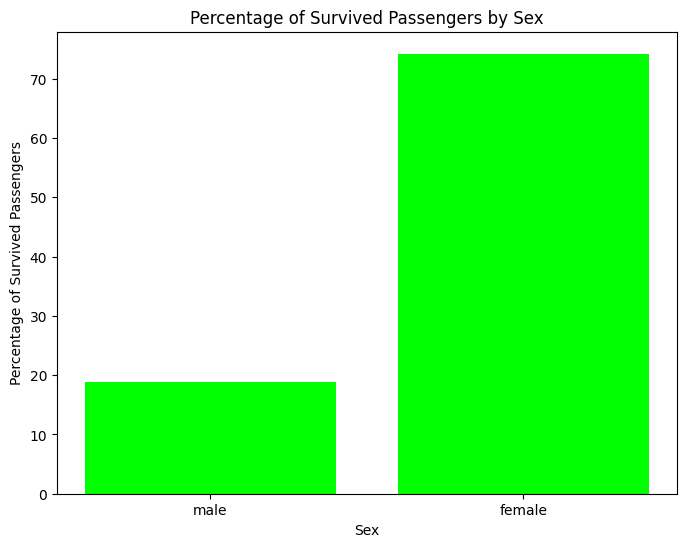

In [109]:

survived_by_sex = data[["Survived", "Sex"]][data.Survived == 1].groupby("Sex").count()

# Добавляем колонку 'Passenger' с общим количеством людей данного пола
passenger_count = data["Sex"].value_counts()
survived_by_sex['Passenger'] = passenger_count

# Добавляем колонку 'PersSurv' с процентом выживших от общего количества пассажиров данного пола
survived_by_sex['PersSurv'] = (survived_by_sex['Survived'] / passenger_count) * 100
print(survived_by_sex)



import matplotlib.pyplot as plt

# Создаем график
plt.figure(figsize=(8, 6))
plt.bar(survived_by_sex.index, survived_by_sex['PersSurv'], color='lime')

# Добавляем заголовок и подписи осей
plt.title('Percentage of Survived Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Percentage of Survived Passengers')

# Устанавливаем значения на оси X (1 - female, 0 - male)
plt.xticks([1, 0], ['female', 'male'])

# Показываем график
plt.show()

 Видим что выживаемость мужчин крайне мала и составляет всего около 20 процентов, в то время как выживаемость женщин составила более 70

             Fare
Pclass           
1       84.154687
2       20.662183
3       13.675550


Text(0, 0.5, 'Цена которую заплатил пасажир')

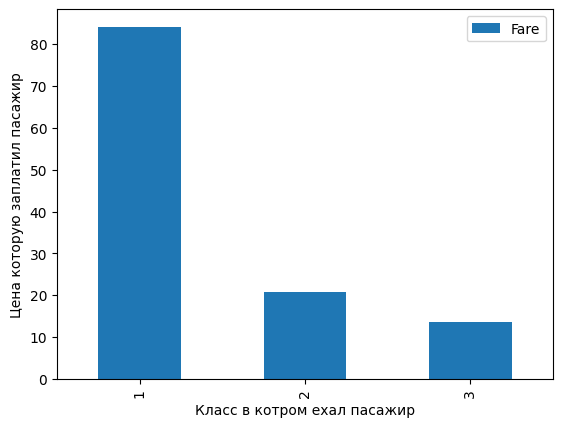

In [117]:
fare_and_class = data[["Pclass","Fare"]].groupby("Pclass").agg("mean")
print(fare_and_class)
fare_and_class.plot.bar()
plt.xlabel("Класс в котром ехал пасажир")
plt.ylabel("Цена которую заплатил пасажир")


In [125]:
data['AgeGroup'] = range(len(data))

for i in range(len(data)):
  if data.Age[i] < 18:
    data['AgeGroup'][i] = 'Child'
  elif data.Age[i] < 60 and data.Age[i] >= 18:
    data['AgeGroup'][i] = 'Adult'
  elif data.Age[i] > 60:
    data['AgeGroup'][i] = 'Old man'
  else:
    data['AgeGroup'][i] = None
data.head()

<ipython-input-125-6dfa0d6eec1e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AgeGroup'][i] = 'Adult'


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Adult


In [133]:


age_and_class = data[["Pclass","Age"]].groupby("Pclass").agg("mean")
print(age_and_class)

              Age
Pclass           
1       38.233441
2       29.877630
3       25.140620


Видим, что в первом классе в среднем едут люди старше, что может быть связано с их заработком т.к. в страшем возрасте люди имеет более оплачиваемые позиции. Стоет учесть,что так как первый класс стоит дороже, то детей в нем не так много, ибо родителем не выгодно покупать много дорогих билетов. ПРоверим эту теорию, однако из матрицы корреляции видим что это не так и эти факторы мало оказывают влияние на друг друга

In [143]:
combined_data = data[["Pclass","Survived"]].groupby("Pclass").agg("mean")
combined_data.head()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Видим что люди из первого класса(63 процента выживаемости) выживают чаще чем из второг(47 процентов выживаемости) и гораздо чаще чем из 3его(24 процента выживаемости)

вывод: Женщины выживают гораздно чаще чем мужчины, что могло бы быть обьеснянно классом, которым они летают, однако пол и выбор класса мало связаны с друг другом, значит тут имеет значение какой-либо внешний фактор например более тщательное отношение к техники безопасности со стороны женщин или первостепенная помощь женщинам в случае трагедии на самолете. Цена первого класса гораздно больше и соотвественно в нем летают люди по старше, так как чаще имеют больший заработок. Фактор количества детей не сказывается на этом согласно матрицы корреляции. Остальные факторы не имеют значения согласно матрицы корреляции